<p><h1>SFW <small> - Stefanini Fashion Week</small></h1></p>

A Stefanini estava se preparando para realizar a primeira Fashion Week tecnológica do mundo, sua roupas são feitas com tecnologia de ponta, algumas contendo até inteligência artificial para se adaptar aos gostos que seus clientes. Porém, como foi a primeira vez que a Stefanini está realizando um evento desse estilo nem tudo poderia ser perfeito, as roupas que deveriam chegar uma semana antes estavam previstas para chegar algumas horas antes do evento.

Como é uma quantidade absurda de roupas, um ser humano não ia conseguir classificar e separar tudo a tempo, porém como a Stefanini tem funcionários experientes na área de inteligência artificial, foi então demandado a eles treinar um algoritmo capaz de classificar as roupas entre:

- 0 - Camiseta
- 1 - Calça
- 2 - Pulôver
- 3 - Vestido
- 4 - Casaco
- 5 - Sandália
- 6 - Camisa
- 7 - Tênis
- 8 - Bolsa
- 9 - Tornozeleira

O Dataset a ser utilizado para desenvolver esse modelo foi o famoso Fashion-Mnist e foi carregado pelo tensorflow.

É exigido que para esse modelo seja feito um <b>Multilayer Perceptron</b>. O Framework a ser escolhido é de preferência do desenvolvedor.

<b>É necessário por comentários explicando o código</b>

\* <small>Quem desenvolver o modelo em Numpy terá uma melhor avaliação que os demais</small>

### Importações necessárias

In [126]:
import numpy as np
import matplotlib.pyplot  as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow import keras
import tensorflow as tf
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Dateset carregado

In [127]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [128]:
def plotImgs(imgs, label):
    fig, axs = plt.subplots(3,10, figsize=(25,5))
    axs = axs.flatten()

    for img, ax in zip(X_train[:30], axs):
        ax.imshow(img, cmap='gray')
        ax.axis('off')

    print(label)
    plt.show()

Exemplos de imagens: 


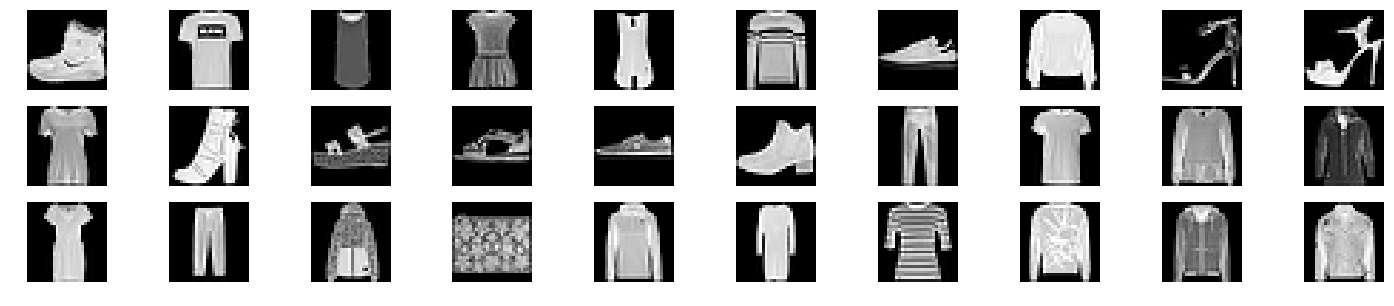

In [129]:
# fig, axs = plt.subplots(3,10, figsize=(25,5))
# axs = axs.flatten()

# for img, ax in zip(X_train[:30], axs):
#     ax.imshow(img, cmap='gray')
#     ax.axis('off')

# print('Exemplos de imagens: ')
# plt.show()
plotImgs(X_train[:30], 'Exemplos de imagens: ')

## To be continued...

In [130]:
# Seu código começa aqui

### PREPROCESSING ###

In [131]:
# reshaping to N x 784
X_train = X_train.reshape((-1,28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

X_train = X_train / 255
X_test = X_test / 255

In [132]:
# keep label binarizer of keras
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

### MODEL ###

In [133]:
#hyperparams keep same values of v1 example(sklearn)
num_classes = 10
num_features = 784
num_output = 10
num_layers_0 = 500
num_layers_1 = 500
learning_rate = 0.0001
batch_size = 128
epochs=100

#tensors
X = tf.placeholder(dtype=tf.float32, shape = (None, num_features))
y = tf.placeholder(dtype=tf.float32, shape = (None, num_classes))

In [134]:
def build_model():
    ## initializing weights with mean 0 and deviation of 1
    ## hidden layer 1
    weights_0 = tf.Variable(tf.random_normal([num_features,num_layers_0], stddev=(1/tf.sqrt(float(num_features)))))
    bias_0 = tf.Variable(tf.random_normal([num_layers_0]))

    ## hidden layer 2
    weights_1 = tf.Variable(tf.random_normal([num_layers_0, num_layers_1], stddev=(1/tf.sqrt(float(num_layers_0)))))
    bias_1 = tf.Variable(tf.random_normal([num_layers_1]))

    ## hidden layer 3(output)
    weights_2 = tf.Variable(tf.random_normal([num_layers_1, num_output], stddev=(1/tf.sqrt(float(num_layers_1)))))
    bias_2 = tf.Variable(tf.random_normal([num_output]))
    
    ## initializing weights and bias
    hidden_output_0 = tf.nn.relu(tf.matmul(X, weights_0) + bias_0)
    hidden_output_1 = tf.nn.relu(tf.matmul(hidden_output_0,weights_1) + bias_1)
    logits = tf.sigmoid(tf.matmul(hidden_output_1, weights_2) + bias_2)
    return logits
    

In [135]:
## model
logits = build_model()

In [136]:
## loss function and optimizers
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [137]:
## metrics
correct_prediction = tf.equal(tf.argmax(y_train,1), tf.argmax(logits,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### TRAIN & PREDICT ###
##### RUNNING TF #####

In [138]:
training_accuracy = []
testing_accuracy = []
training_loss = []
test_loss = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(epochs):    
        arr = np.arange(X_train.shape[0])
        np.random.shuffle(arr) ## suffler data
    
        for index in range(0,X_train.shape[0],batch_size):
            sess.run(optimizer, {
                X: X_train[arr[index:index+batch_size]],
                y: y_train[arr[index:index+batch_size]]
            })
    
        training_loss.append(sess.run(loss, {
            X: X_train,
            y: y_train
        }))
        
        test_loss.append(sess.run(loss, {
            X: X_test,
            y: y_test
        }))
    
        training_accuracy.append(sess.run(accuracy, {
            X: X_train,
            y: y_train
        }))
        
        testing_accuracy.append(accuracy_score(y_test.argmax(1),sess.run(logits, {
            X: X_test
        }).argmax(1)))
        
        print('Epoch:{0}/{1}, loss: {2:.2f} Train acc: {3:.3f}, Test acc:{4:.3f}'
              .format(epoch + 1,epochs,training_loss[epoch],training_accuracy[epoch],testing_accuracy[epoch]))

Epoch:1/10, loss: 2.18 Train acc: 0.285, Test acc:0.277
Epoch:2/10, loss: 2.08 Train acc: 0.350, Test acc:0.340
Epoch:3/10, loss: 2.02 Train acc: 0.389, Test acc:0.376
Epoch:4/10, loss: 1.99 Train acc: 0.383, Test acc:0.373
Epoch:5/10, loss: 1.97 Train acc: 0.409, Test acc:0.395
Epoch:6/10, loss: 1.96 Train acc: 0.404, Test acc:0.392
Epoch:7/10, loss: 1.95 Train acc: 0.405, Test acc:0.397
Epoch:8/10, loss: 1.94 Train acc: 0.413, Test acc:0.403
Epoch:9/10, loss: 1.93 Train acc: 0.408, Test acc:0.398
Epoch:10/10, loss: 1.93 Train acc: 0.406, Test acc:0.394


### PLOT'S ###

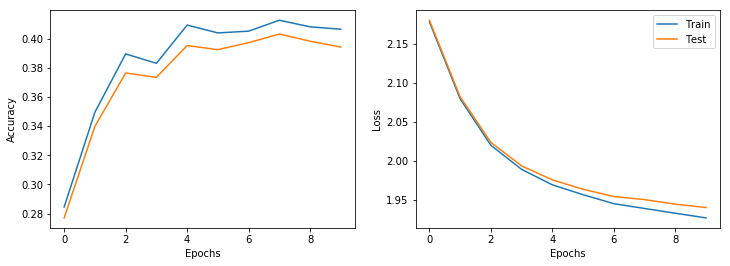

Train Accuracy: 0.41
Test Accuracy:0.39


In [149]:
## Plotting chart of training and testing accuracy as a function of iterations
iterations = list(range(epochs))
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(iterations, training_accuracy, label='Train')
plt.plot(iterations, testing_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.subplot(1,2,2)
plt.plot(iterations, training_loss, label='Train')
plt.plot(iterations, test_loss, label='Test')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()
print("Train Accuracy: {0:.2f}".format(training_accuracy[-1]))
print("Test Accuracy:{0:.2f}".format(testing_accuracy[-1]))